In [22]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

import pmdarima as pmd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt

In [24]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [25]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [26]:
df = pd.read_excel('inflasi.xlsx')
df.head()

,date,data
0,2008-01-01,7.36
1,2008-02-01,7.40
2,2008-03-01,8.17
3,2008-04-01,8.96
4,2008-05-01,10.30


In [27]:
#descriptive statistics
df.describe()

,data
count,180.000000
mean,4.739222
std,2.431044
min,1.320000
25%,3.130000
50%,4.155000
75%,6.235000
max,12.100000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    180 non-null    datetime64[ns]
 1   data    180 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


In [29]:
df = df.set_index(df.date)
df = df.drop(columns = 'date')
df = df.rename(columns = {'#data':'data'})
df.head()

,data
date,
2008-01-01,7.36
2008-02-01,7.40
2008-03-01,8.17
2008-04-01,8.96
2008-05-01,10.30


In [30]:
df1 = df['data']

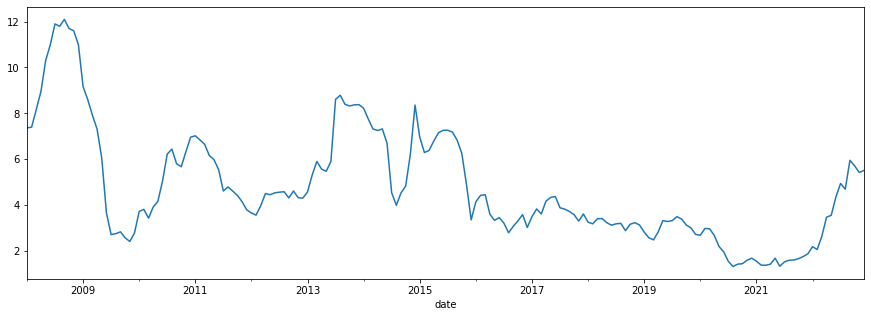

In [31]:
plt.figure(figsize = (15,5))
df1.plot();

In [32]:
#stasionarity test
adf_test(df1)

Results of Dickey-Fuller Test:
Test Statistic                  -2.162217
p-value                          0.220243
#Lags Used                      12.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


In [33]:
#differencing
df2 = df1.diff().dropna()

In [34]:
adf_test(df2)

Results of Dickey-Fuller Test:
Test Statistic                -7.018998e+00
p-value                        6.617951e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


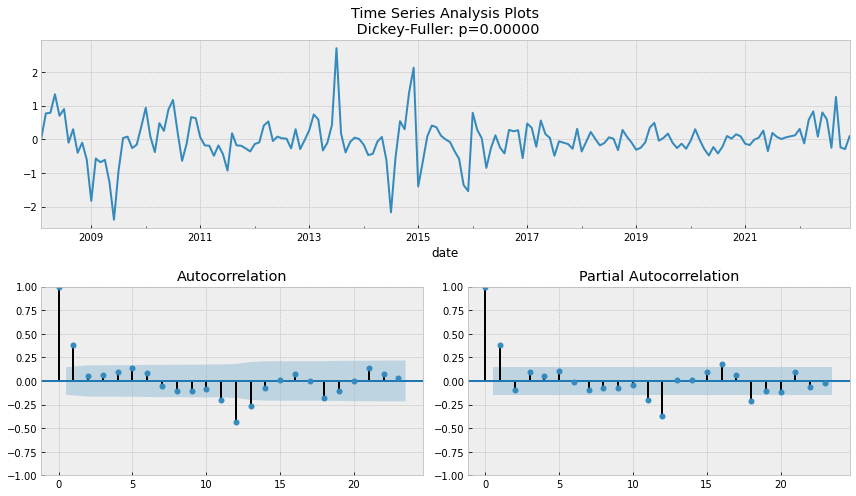

In [35]:
#acf pacf plot
tsplot(df2)

In [36]:
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, start_p = 0, start_q = 0, test = "adf", seasonal = False, trace = True)
    
    return autoarima_model

In [37]:
#arima estimator
estimator_model = arimamodel(df1)
estimator_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1114.771, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=305.096, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=306.800, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=306.854, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=700.823, Time=0.40 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=307.041, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=301.019, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=330.227, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=302.261, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=302.473, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=833.611, Time=0.04 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  180
Model:               SARIMAX(2, 0, 5)   Log Likelihood                -133.567
Date:                Mon, 16 Jan 2023   AIC                            285.133
Time:                        05:56:10   BIC                            313.870
Sample:                    01-01-2008   HQIC                           296.785
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2829      0.097      2.911      0.004       0.092       0.473
ar.L1          1.6651      0.092     18.035      0.000       1.484       1.846
ar.L2         -0.7242      0.088     -8.230      0.000      -0.897      -0.552
ma.L1         -0.4635      0.124     -3.738      0.000      -0.706      -0.220
ma.L2         -0.2653      0.097     -2.731      0.006      -0.456      -0.075
ma.L3          0.1489      0.112      1.328      0.184      -0.071       0.369
ma.L4          0.2497      0.083      2.997      0.003       0.086       0.413
ma.L5          0.3060      0.098      3.124      0.002       0.114       0.498
sigma2         0.2484      0.021     11.711      0.000       0.207       0.290
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               167.00
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.99
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
#parameter estimation
arima_model = ARIMA(df1, order = (2, 1, 3))
model = arima_model.fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                  180
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -135.074
Date:                Mon, 16 Jan 2023   AIC                            282.148
Time:                        05:56:11   BIC                            301.272
Sample:                    01-01-2008   HQIC                           289.903
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4852      0.067     22.178      0.000       1.354       1.616
ar.L2         -0.7123      0.062    -11.543      0.000      -0.833      -0.591
ma.L1         -1.2312      0.170     -7.255      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    
    return rmse

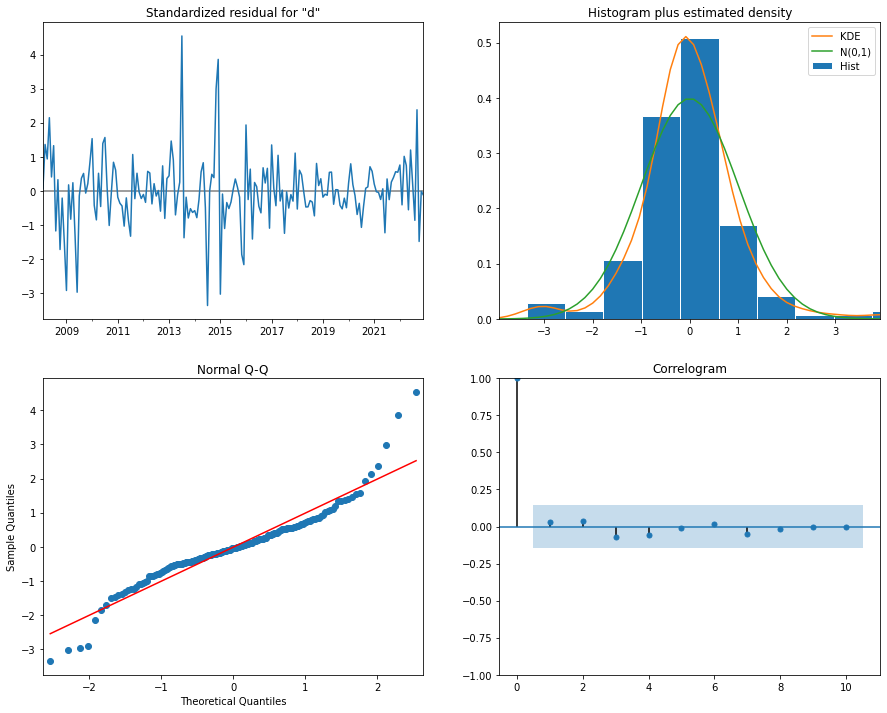

In [40]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

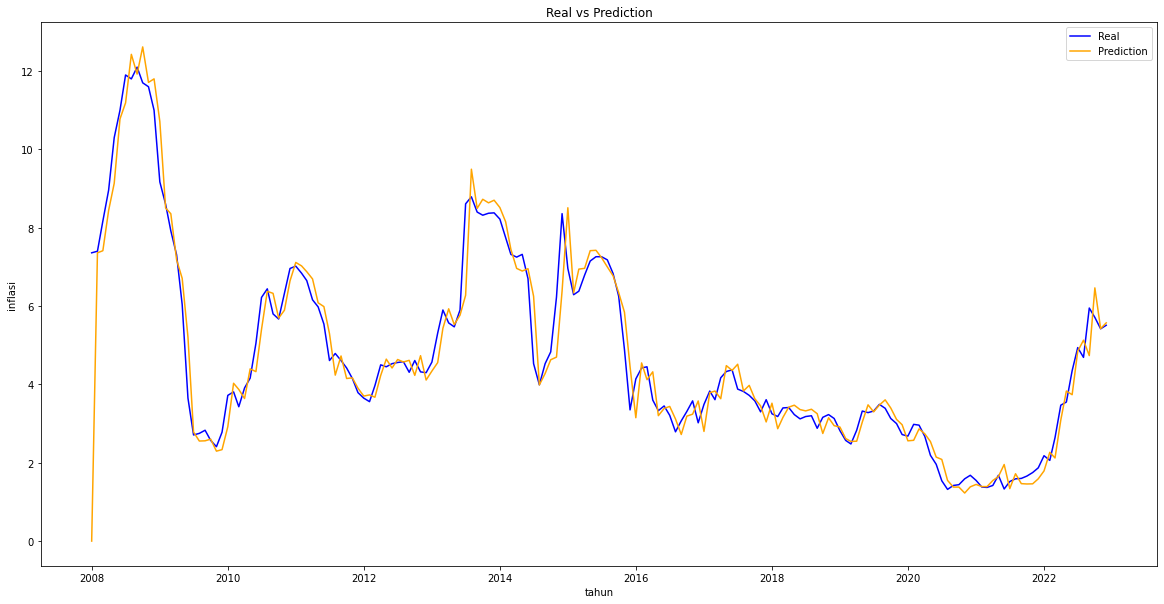

In [41]:
#in sample forecasting
pred = model.predict(dynamic = False)
pred

plt.figure(figsize = (20, 10))

plt.plot(df1, color = 'b', label = 'Real')
plt.plot(pred, color = 'orange', label = 'Prediction')

plt.xlabel('tahun')
plt.ylabel('inflasi')
plt.title('Real vs Prediction')

plt.legend()

plt.show()

In [42]:
#model accuracy test
model_mape = mape(df1, pred)
model_rmse = rmse(df1, pred)
print('MAPE: ', model_mape)
print('RMSE: ', model_rmse)

MAPE:  8.759966316357891
RMSE:  0.752369515401903


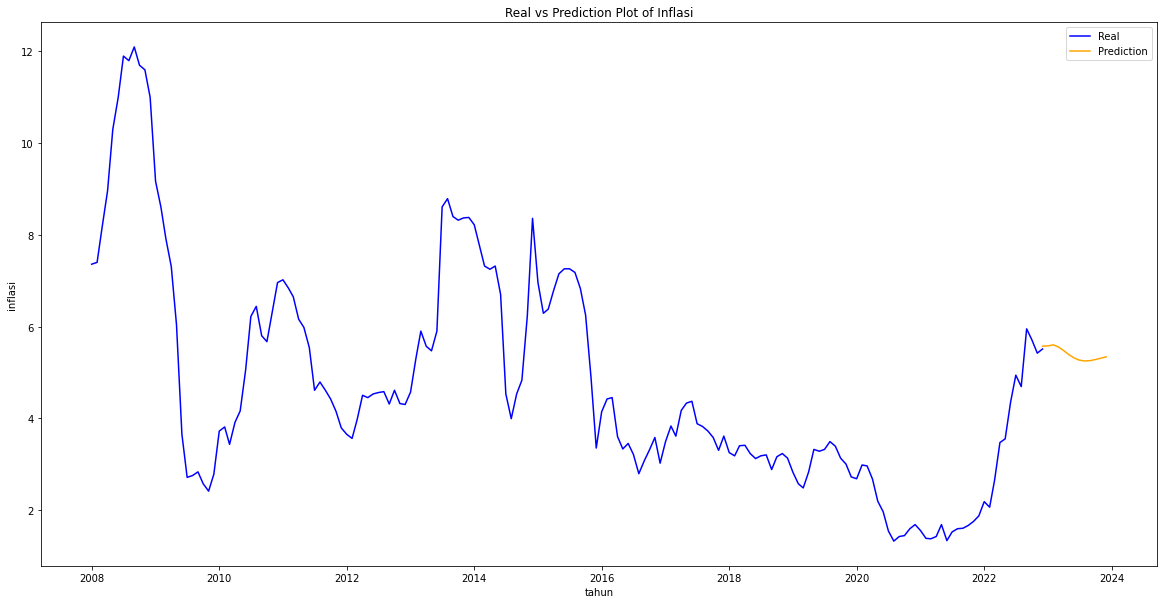

In [43]:
#out sample forecasting
pred = model.predict(start=pd.to_datetime('2022-12-01'),end=pd.to_datetime('2023-12-01'))
pred

plt.figure(figsize = (20, 10))

plt.plot(df1, color = 'b', label = 'Real')
plt.plot(pred, color = 'orange', label = 'Prediction')

plt.xlabel('tahun')
plt.ylabel('inflasi')
plt.title('Real vs Prediction Plot of Inflasi')

plt.legend()

plt.show()

In [44]:
pred.describe()

count    13.000000
mean      5.399098
std       0.137441
min       5.248736
25%       5.281157
50%       5.339200
75%       5.557110
max       5.600661
Name: predicted_mean, dtype: float64